# E-retail factors for customer activation and retention: A case study from Indian e-commerce customers



Problem Statement: 



Customer satisfaction has emerged as one of the most important factors that guarantee the success of online store; it has been posited as a key stimulant of purchase, repurchase intentions and customer loyalty. A comprehensive review of the literature, theories and models have been carried out to propose the models for customer activation and customer retention. Five major factors that contributed to the success of an e-commerce store have been identified as: service quality, system quality, information quality, trust and net benefit. The research furthermore investigated the factors that influence the online customers repeat purchase intention. The combination of both utilitarian value and hedonistic values are needed to affect the repeat purchase intention (loyalty) positively. The data is collected from the Indian online shoppers. Results indicate the e-retail success factors, which are very much critical for customer satisfaction.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
import scipy as stats
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
warnings.filterwarnings('ignore')

In [13]:
import os
os.getcwd()

'C:\\Users\\User4'

In [18]:
#To print all columns
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [20]:
# Reading the excel file
customerdata = pd.read_excel("customer_retention_dataset.xlsx")
pd.set_option("display.max_columns",None)
customerdata

1Gender of respondent 2 How old are you?   \
0                    Male         31-40 years   
1                  Female         21-30 years   
2                  Female         21-30 years   
3                    Male         21-30 years   
4                  Female         21-30 years   
5                  Female         31-40 years   
6                    Male         41-50 yaers   
7                    Male         41-50 yaers   
8                  Female  Less than 20 years   
9                  Female         31-40 years   
10                   Male         31-40 years   
11                 Female         41-50 yaers   
12                 Female  51 years and above   
13                 Female         31-40 years   
14                 Female         21-30 years   
15                 Female         21-30 years   
16                   Male         31-40 years   
17                   Male         41-50 yaers   
18                 Female         41-50 yaers   
19                 Female         21-30 years   
20                 Female         21-30 years   
21                   Male         31-40 years   
22                   Male         41-50 yaers   
23                 Female         41-50 yaers   
24                 Female         21-30 years   
25                 Female         21-30 years   
26                   Male         21-30 years   
27                   Male         31-40 years   
28                 Female         41-50 yaers   
29                 Female         41-50 yaers   
30                 Female  Less than 20 years   
31                   Male         31-40 years   
32                   Male         31-40 years   
33                 Female         41-50 yaers   
34                 Female  51 years and above   
35                 Female         21-30 years   
36                   Male         31-40 years   
37                   Male         41-50 yaers   
38                 Female         41-50 yaers   
39                 Female         21-30 years   
40                 Female         21-30 years   
41                   Male         31-40 years   
42                   Male         21-30 years   
43                 Female         21-30 years   
44                 Female         31-40 years   
45                 Female         41-50 yaers   
46                   Male         41-50 yaers   
47                   Male  Less than 20 years   
48                 Female         31-40 years   
49                 Female         31-40 years   
50                 Female         41-50 yaers   
51                   Male  51 years and above   
52                   Male         41-50 yaers   
53                 Female         41-50 yaers   
54                 Female         21-30 years   
55                 Female         21-30 years   
56                   Male         21-30 years   
57                   Male         21-30 years   
58                 Female         31-40 years   
59                 Female         41-50 yaers   
60                 Female         41-50 yaers   
61                   Male  Less than 20 years   
62                   Male         31-40 years   
63                 Female         31-40 years   
64                 Female         41-50 yaers   
65                 Female  51 years and above   
66                   Male         31-40 years   
67                   Male         41-50 yaers   
68                 Female         41-50 yaers   
69                 Female         21-30 years   
70                 Female         21-30 years   
71                   Male         31-40 years   
72                   Male         21-30 years   
73                 Female         21-30 years   
74                 Female         31-40 years   
75                 Female         41-50 yaers   
76                   Male         41-50 yaers   
77                   Male  Less than 20 years   
78                 Female         31-40 years   
79                 Female         31-40 years   
80                 Female         4

Dataset contains customer retention details

The dataset is the combination of both utilitarian value and hedonistic values which affects the  purchase intention of the customers.

Utilitarian values: Utilitarian value is an objective value which provides some functional benefits to the consumers and helps consumers to accomplish practical tasks.

Hedonistic value: Hedonistic value is subjective (Psychological) value which provides an experiential satisfaction. In other words, the immediate psychological gratification that comes from experiencing some activity or from consumption of a product.


# Exploratory Data Analysis

In [21]:
# Checking the dimension of dataset 
customerdata.shape

(269, 71)

In [22]:
customerdata.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

In [23]:
# Checking the type of dataset
customerdata.dtypes

1Gender of respondent                                                                                                                                                                                                  object
2 How old are you?                                                                                                                                                                                                     object
3 Which city do you shop online from?                                                                                                                                                                                  object
4 What is the Pin Code of where you shop online from?                                                                                                                                                                   int64
5 Since How Long You are Shopping Online ?                                                                      

Dataset contains object and integer type data types.

In [39]:
# Renaming the column names for better understanding
columns = ['Gender','Age','City','citycode','Shopping_stared','Shopping_Frequency','Internet_Access','device',
           'Screen_Size','OS', 'Browser_Used','Channel_First','Login_Mode','Time_Explored','Payment_Mode','Abandon_Frequency',
          'Abandon_Reason','Content_Readability','Similar_Product_Info','Seller_Product_Info','Product_Info_Clarity','Navigation_Ease',
          'Loading_Processing_Speed','User_Friendly_Interface','Convenient_Payment_Mode','Timely_Fulfilment_Trust','Customer_Support_Response',
          'Customer_Privacy_Guarantee','Various_Channel_Responses','Benefits','Enjoy','Convenience','Return_Replacement_Policy','Loyalty_Programs_Access',
          'Info_Satisfaction','Site_Quality_Satisfaction','Net_Benefit_Satisfaction','Trust','Product_Several_Category','Relevant_Product_Info','Monetary_Savings',
          'Patronizing_Convenience','Adventure_Sense','Social_Status','Gratification','Role_Fulfilment','Money_Worthy','Shopped_From','Easy_Web_App',
           'Visually_Appealing_WebApp','Product_Variety','Complete_Product_Info','Fast_WebApp','Reliable_WebApp','Quick_Purchase','Payment_Options_Availability',
           'Fast_Delivery','Customer_Privacy_Info','Financial_Security_Info','Perceived_Trustworthiness','Multichannel_Assistance','Long_Login_Time','Long_Display_Time',
           'Late_Price_Declare','Long_Loading_Time','Limited_Payment_Mode','Late_Delivery','WebApp_Design_Change','Page_Disruption','WebApp_Efficiency',
           'Recommendation']

In [40]:
customerdata.columns = columns

In [41]:
# Checking the new column names after renaming them
customerdata.columns

Index(['Gender', 'Age', 'City', 'citycode', 'Shopping_stared',
       'Shopping_Frequency', 'Internet_Access', 'device', 'Screen_Size', 'OS',
       'Browser_Used', 'Channel_First', 'Login_Mode', 'Time_Explored',
       'Payment_Mode', 'Abandon_Frequency', 'Abandon_Reason',
       'Content_Readability', 'Similar_Product_Info', 'Seller_Product_Info',
       'Product_Info_Clarity', 'Navigation_Ease', 'Loading_Processing_Speed',
       'User_Friendly_Interface', 'Convenient_Payment_Mode',
       'Timely_Fulfilment_Trust', 'Customer_Support_Response',
       'Customer_Privacy_Guarantee', 'Various_Channel_Responses', 'Benefits',
       'Enjoy', 'Convenience', 'Return_Replacement_Policy',
       'Loyalty_Programs_Access', 'Info_Satisfaction',
       'Site_Quality_Satisfaction', 'Net_Benefit_Satisfaction', 'Trust',
       'Product_Several_Category', 'Relevant_Product_Info', 'Monetary_Savings',
       'Patronizing_Convenience', 'Adventure_Sense', 'Social_Status',
       'Gratification', 'Role_

In [42]:
customerdata.head()

Gender          Age           City  citycode Shopping_stared  \
0    Male  31-40 years          Delhi    110009   Above 4 years   
1  Female  21-30 years          Delhi    110030   Above 4 years   
2  Female  21-30 years  Greater Noida    201308       3-4 years   
3    Male  21-30 years        Karnal     132001       3-4 years   
4  Female  21-30 years     Bangalore     530068       2-3 years   

   Shopping_Frequency  Internet_Access      device Screen_Size  \
0         31-40 times          Dial-up     Desktop      Others   
1  41 times and above            Wi-Fi  Smartphone  4.7 inches   
2  41 times and above  Mobile Internet  Smartphone  5.5 inches   
3  Less than 10 times  Mobile Internet  Smartphone  5.5 inches   
4         11-20 times            Wi-Fi  Smartphone  4.7 inches   

                      OS   Browser_Used      Channel_First       Login_Mode  \
0  Window/windows Mobile  Google chrome      Search Engine    Search Engine   
1                IOS/Mac  Google chrome      Search Engine  Via application   
2                Android  Google chrome      Search Engine  Via application   
3                IOS/Mac         Safari      Search Engine    Search Engine   
4                IOS/Mac         Safari  Content Marketing  Via application   

       Time_Explored                        Payment_Mode Abandon_Frequency  \
0          6-10 mins  E-wallets (Paytm, Freecharge etc.)         Sometimes   
1  more than 15 mins                  Credit/Debit cards   Very frequently   
2         11-15 mins  E-wallets (Paytm, Freecharge etc.)         Sometimes   
3          6-10 mins                  Credit/Debit cards             Never   
4  more than 15 mins                  Credit/Debit cards        Frequently   

              Abandon_Reason Content_Readability Similar_Product_Info  \
0              Lack of trust           Agree (4)      Indifferent (3)   
1  Promo code not applicable  Strongly agree (5)   Strongly agree (5)   
2  Promo code not applicable  Strongly agree (5)            Agree (4)   
3   Better alternative offer           Agree (4)            Agree (4)   
4   Better alternative offer  Strongly agree (5)      Indifferent (3)   

  Seller_Product_Info Product_Info_Clarity     Navigation_Ease  \
0     Indifferent (3)            Agree (4)           Agree (4)   
1  Strongly agree (5)   Strongly agree (5)  Strongly agree (5)   
2           Agree (4)            Agree (4)           Agree (4)   
3     Indifferent (3)            Agree (4)  Strongly agree (5)   
4     Indifferent (3)            Agree (4)           Agree (4)   

  Loading_Processing_Speed User_Friendly_Interface Convenient_Payment_Mode  \
0    Strongly disagree (1)           Dis-agree (2)           Dis-agree (2)   
1       Strongly agree (5)      Strongly agree (5)      Strongly agree (5)   
2                Agree (4)      Strongly agree (5)      Strongly agree (5)   
3                Agree (4)      Strongly agree (5)      Strongly agree (5)   
4       Strongly agree (5)      Strongly agree (5)      Strongly agree (5)   

  Timely_Fulfilment_Trust Customer_Support_Response  \
0            Disagree (2)        Strongly agree (5)   
1      Strongly agree (5)        Strongly agree (5)   
2      Strongly agree (5)        Strongly agree (5)   
3               Agree (4)        Strongly agree (5)   
4               Agree (4)        Strongly agree (5)   

  Customer_Privacy_Guarantee Various_Channel_Responses            Benefits  \
0                  Agree (4)                 Agree (4)     indifferent (3)   
1         Strongly agree (5)        Strongly agree (5)  Strongly agree (5)   
2         Strongly agree (5)        Strongly agree (5)  Strongly agree (5)   
3         Strongly agree (5)                 Agree (4)           Agree (4)   
4                  Agree (4)        Strongly agree (5)  Strongly agree (5)   

                   Enjoy         Convenience Return_Replacement_Policy  \
0  Strongly disagree (1)       Dis-agree (2)             Dis-agree (2)   
1     

In [43]:
# Checking number of unique values in each column
customerdata.nunique()

Gender                           2
Age                              5
City                            11
citycode                        39
Shopping_stared                  5
Shopping_Frequency               6
Internet_Access                  4
device                           4
Screen_Size                      4
OS                               3
Browser_Used                     4
Channel_First                    3
Login_Mode                       5
Time_Explored                    5
Payment_Mode                     3
Abandon_Frequency                4
Abandon_Reason                   5
Content_Readability              4
Similar_Product_Info             4
Seller_Product_Info              5
Product_Info_Clarity             4
Navigation_Ease                  4
Loading_Processing_Speed         5
User_Friendly_Interface          5
Convenient_Payment_Mode          3
Timely_Fulfilment_Trust          4
Customer_Support_Response        4
Customer_Privacy_Guarantee       3
Various_Channel_Resp

In [44]:
# Checking null values in the dataframe
customerdata.isnull().sum()

Gender                          0
Age                             0
City                            0
citycode                        0
Shopping_stared                 0
Shopping_Frequency              0
Internet_Access                 0
device                          0
Screen_Size                     0
OS                              0
Browser_Used                    0
Channel_First                   0
Login_Mode                      0
Time_Explored                   0
Payment_Mode                    0
Abandon_Frequency               0
Abandon_Reason                  0
Content_Readability             0
Similar_Product_Info            0
Seller_Product_Info             0
Product_Info_Clarity            0
Navigation_Ease                 0
Loading_Processing_Speed        0
User_Friendly_Interface         0
Convenient_Payment_Mode         0
Timely_Fulfilment_Trust         0
Customer_Support_Response       0
Customer_Privacy_Guarantee      0
Various_Channel_Responses       0
Benefits      

There are no missing values in data

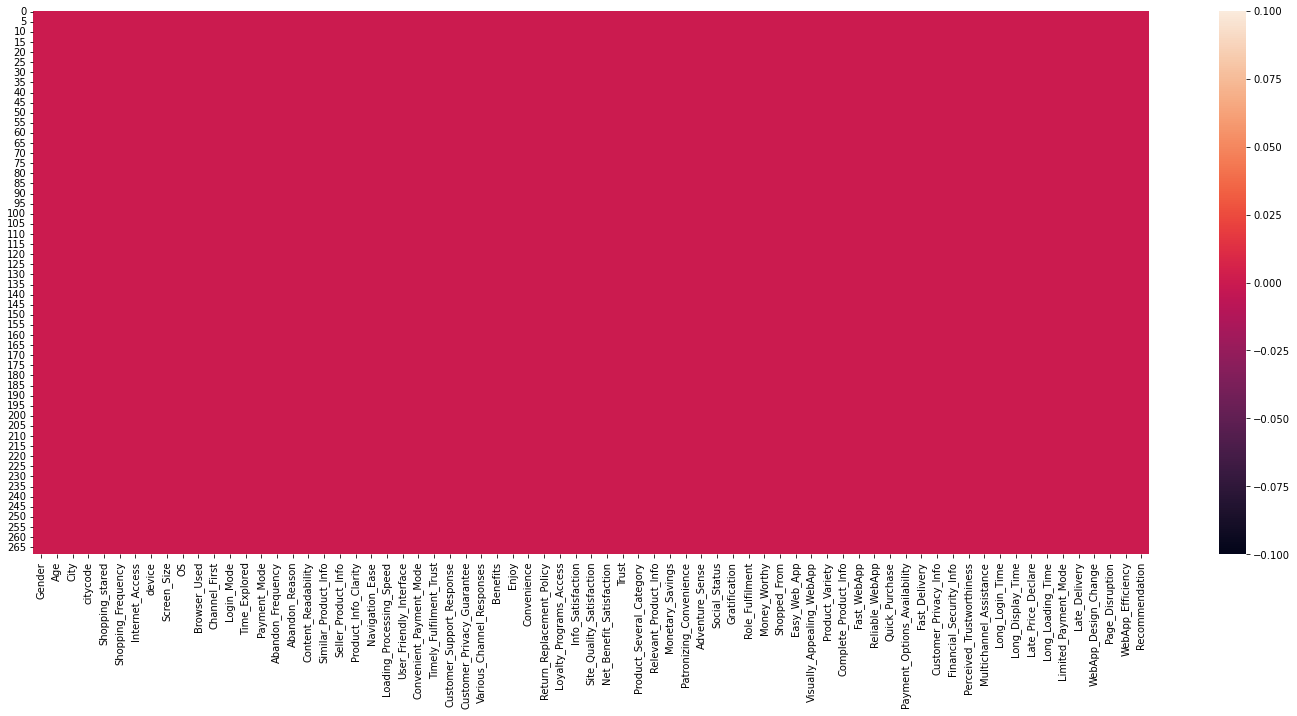

In [49]:
# Let's visualize the null values clearly
plt.figure(figsize=(25,10))
sns.heatmap(customerdata.isnull())
plt.show()

In [51]:
customerdata.info

<bound method DataFrame.info of      Gender                 Age           City  citycode   Shopping_stared  \
0      Male         31-40 years          Delhi    110009     Above 4 years   
1    Female         21-30 years          Delhi    110030     Above 4 years   
2    Female         21-30 years  Greater Noida    201308         3-4 years   
3      Male         21-30 years        Karnal     132001         3-4 years   
4    Female         21-30 years     Bangalore     530068         2-3 years   
5    Female         31-40 years          Noida    201308     Above 4 years   
6      Male         41-50 yaers          Delhi    110011     Above 4 years   
7      Male         41-50 yaers          Delhi    110018         3-4 years   
8    Female  Less than 20 years          Solan    173229         2-3 years   
9    Female         31-40 years          Delhi    110039  Less than 1 year   
10     Male         31-40 years      Moradabad    244001     Above 4 years   
11   Female         41-50 yaers 

In [52]:
#let's check the correlation matrix
customerdata.corr()

citycode
citycode       1.0

<AxesSubplot:>

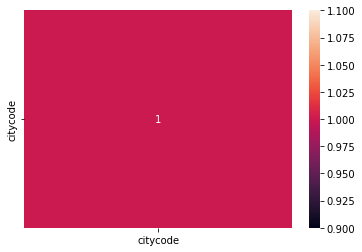

In [53]:
cor=customerdata.corr()
sns.heatmap(cor,annot=True)

In [54]:
# Checking the value counts of each columns
for i in df.columns:
        print(df[i].value_counts())
        print('*'*50)

Female    181
Male       88
Name: 1Gender of respondent, dtype: int64
**************************************************
31-40 years           81
21-30 years           79
41-50 yaers           70
Less than 20 years    20
51 years and above    19
Name: 2 How old are you? , dtype: int64
**************************************************
Delhi            58
Greater Noida    43
Noida            40
Bangalore        37
Karnal           27
Solan            18
Ghaziabad        18
Gurgaon          12
Merrut            9
Moradabad         5
Bulandshahr       2
Name: 3 Which city do you shop online from?, dtype: int64
**************************************************
201308    38
132001    19
201310    18
110044    16
250001     9
173229     9
173212     9
560010     8
132036     8
122018     8
560037     8
110008     7
110011     7
201306     7
110014     6
110018     6
201305     5
201008     5
201009     5
201312     5
244001     5
530068     5
122009     4
201001     4
560003     4
201304   

Strongly agree (5)    135
Agree (4)              98
indifferent (3)        31
Disagree (2)            5
Name: 40 Provision of complete and relevant product information, dtype: int64
**************************************************
Strongly agree (5)    148
Agree (4)              75
Disagree (2)           31
indifferent (3)        15
Name: 41 Monetary savings, dtype: int64
**************************************************
Agree (4)             138
indifferent (3)        77
Strongly agree (5)     54
Name: 42 The Convenience of patronizing the online retailer, dtype: int64
**************************************************
Agree (4)                101
indifferent (3)           59
Strongly agree (5)        54
Dis-agree (2)             50
Strongly disagree (1)      5
Name: 43 Shopping on the website gives you the sense of adventure, dtype: int64
**************************************************
indifferent (3)          100
Agree (4)                 59
Strongly agree (5)        48
Strong

In some columns we have duplicate entries i.e., two words or entries with same meaning, We will replace all the same categories by appropriate values.

In [57]:
# Replacing 42 times and above by 41 times and above in the column Shopping_Frequency
customerdata["Shopping_Frequency"]=customerdata["Shopping_Frequency"].replace('42 times and above','41 times and above')

# Replacing Mobile internet by Mobile Internet in the column Internet_Accessibility
customerdata["Internet_Access"]=customerdata["Internet_Access"].replace('Mobile internet','Mobile Internet')

# Replacing Very frequently by Frequently in the column Abandon_Frequency
customerdata["Abandon_Frequency"]=customerdata["Abandon_Frequency"].replace('Very frequently','Frequently')

In [58]:
# Replacing Strongly agree (5) by Agree (4) in the column Content_Readability
customerdata["Content_Readability"]=customerdata["Content_Readability"].replace('Strongly agree (5)','Agree (4)')

# Replacing Strongly agree (5) by Agree (4) in the column Similar_Product_Info
customerdata["Similar_Product_Info"]=customerdata["Similar_Product_Info"].replace('Strongly agree (5)','Agree (4)')

# Replacing Strongly agree (5) by Agree (4) and strongly disagree by dis-agree in the column Seller_Product_Info
customerdata["Seller_Product_Info"]=customerdata["Seller_Product_Info"].replace('Strongly disagree (1)','Dis-agree (2)')
customerdata["Seller_Product_Info"]=customerdata["Seller_Product_Info"].replace('Strongly agree (5)','Agree (4)')

# Replacing Strongly agree (5) by Agree (4) and Strongly disagree (1) by Dis-agree(2) in the column Product_Info_Clarity
customerdata["Product_Info_Clarity"]=customerdata["Product_Info_Clarity"].replace('Strongly disagree (1)','Dis-agree (2)')
customerdata["Product_Info_Clarity"]=customerdata["Product_Info_Clarity"].replace('Strongly agree (5)','Agree (4)')

# Replacing Strongly disagree (1) by Dis-agree(2) and Strongly agree (5) by Agree (4) in the column Navigation_Ease
customerdata["Navigation_Ease"]=customerdata["Navigation_Ease"].replace('Strongly disagree (1)','Dis-agree (2)')
customerdata["Navigation_Ease"]=customerdata["Navigation_Ease"].replace('Strongly agree (5)','Agree (4)')

# Replacing Strongly disagree (1) by Dis-agree(2) and Strongly agree (5) by Agree (4) in the column Loading_Processing_Speed
customerdata["Loading_Processing_Speed"]=customerdata["Loading_Processing_Speed"].replace('Strongly disagree (1)','Dis-agree (2)')
customerdata["Loading_Processing_Speed"]=customerdata["Loading_Processing_Speed"].replace('Strongly agree (5)','Agree (4)')

# Replacing Strongly disagree (1) by Dis-agree(2) and Strongly agree (5) by Agree (4) in the column User_Friendly_Interface
customerdata["User_Friendly_Interface"]=customerdata["User_Friendly_Interface"].replace('Strongly disagree (1)','Dis-agree (2)')
customerdata["User_Friendly_Interface"]=customerdata["User_Friendly_Interface"].replace('Strongly agree (5)','Agree (4)')

In [59]:
# Replacing Strongly agree (5) by Agree (4) in the column Convenient_Payment_Mode
customerdata["Convenient_Payment_Mode"]=customerdata["Convenient_Payment_Mode"].replace('Strongly agree (5)','Agree (4)')

# Replacing Strongly agree (5) by Agree (4) in the column Timely_Fulfilment_Trust
customerdata["Timely_Fulfilment_Trust"]=customerdata["Timely_Fulfilment_Trust"].replace('Strongly agree (5)','Agree (4)')

# Replacing Strongly agree (5) by Agree (4) in the column Customer_Support_Response
customerdata["Customer_Support_Response"]=customerdata["Customer_Support_Response"].replace('Strongly agree (5)','Agree (4)')

# Replacing Strongly agree (5) by Agree (4) in the column Customer_Privacy_Guarantee
customerdata["Customer_Privacy_Guarantee"]=customerdata["Customer_Privacy_Guarantee"].replace('Strongly agree (5)','Agree (4)')

# Replacing Strongly agree (5) by Agree (4) in the column Various_Channel_Responses
customerdata["Various_Channel_Responses"]=customerdata["Various_Channel_Responses"].replace('Strongly agree (5)','Agree (4)')

# Replacing Strongly disagree (1) by Dis-agree(2) Strongly agree (5) by Agree (4) in the column Benefits
customerdata["Benefits"]=customerdata["Benefits"].replace('Strongly disagree (1)','Dis-agree (2)')
customerdata["Benefits"]=customerdata["Benefits"].replace('Strongly agree (5)','Agree (4)')

# Replacing Strongly disagree (1) by Dis-agree(2) and Strongly agree (5) by Agree (4) in the column Enjoy
customerdata["Enjoy"]=customerdata["Enjoy"].replace('Strongly disagree (1)','Dis-agree (2)')
customerdata["Enjoy"]=customerdata["Enjoy"].replace('Strongly agree (5)','Agree (4)')

# Replacing Strongly agree (5) by Agree (4) in the column Convenience
customerdata["Convenience"]=customerdata["Convenience"].replace('Strongly agree (5)','Agree (4)')

# Replacing Strongly agree (5) by Agree (4) in the column Return_Replacement_Policy
customerdata["Return_Replacement_Policy"]=customerdata["Return_Replacement_Policy"].replace('Strongly agree (5)','Agree (4)')

In [61]:
# Replacing Strongly disagree (1) by Dis-agree(2) and Strongly agree (5) by Agree (4) in the column Loyalty_Programs_Access
customerdata["Loyalty_Programs_Access"]=customerdata["Loyalty_Programs_Access"].replace('Strongly disagree (1)','Dis-agree (2)')
customerdata["Loyalty_Programs_Access"]=customerdata["Loyalty_Programs_Access"].replace('Strongly agree (5)','Agree (4)')

# Replacing Strongly agree (5) by Agree (4) in the column Info_Satisfaction
customerdata["Info_Satisfaction"]=customerdata["Info_Satisfaction"].replace('Strongly agree (5)','Agree (4)')

# Replacing Strongly agree (5) by Agree (4) in the column Site_Quality_Satisfaction
customerdata["Site_Quality_Satisfaction"]=customerdata["Site_Quality_Satisfaction"].replace('Strongly agree (5)','Agree (4)')

# Replacing Strongly agree (5) by Agree (4) in the column Net_Benefit_Satisfaction
customerdata["Net_Benefit_Satisfaction"]=customerdata["Net_Benefit_Satisfaction"].replace('Strongly agree (5)','Agree (4)')

# Replacing Strongly disagree (1) by Dis-agree(2) and Strongly agree (5) by Agree (4) in the column Trust
customerdata["Trust"]=customerdata["Trust"].replace('Strongly disagree (1)','Dis-agree (2)')
customerdata["Trust"]=customerdata["Trust"].replace('Strongly agree (5)','Agree (4)')

# Replacing Strongly agree (5) by Agree (4) in the column Product_Several_Category
customerdata["Product_Several_Category"]=customerdata["Product_Several_Category"].replace('Strongly agree (5)','Agree (4)')

# Replacing Strongly agree (5) by Agree (4) in the column Relevant_Product_Info
customerdata["Relevant_Product_Info"]=customerdata["Relevant_Product_Info"].replace('Strongly agree (5)','Agree (4)')

In [63]:
# Replacing Strongly agree (5) by Agree (4) in the column Monetary_Savings
customerdata["Monetary_Savings"]=customerdata["Monetary_Savings"].replace('Strongly agree (5)','Agree (4)')

# Replacing Strongly agree (5) by Agree (4) in the column Patronizing_Convenience
customerdata["Patronizing_Convenience"]=customerdata["Patronizing_Convenience"].replace('Strongly agree (5)','Agree (4)')

# Replacing Strongly disagree (1) by Dis-agree(2) and Strongly agree (5) by Agree (4) in the column Adventure_Sense
customerdata["Adventure_Sense"]=customerdata["Adventure_Sense"].replace('Strongly disagree (1)','Dis-agree (2)')
customerdata["Adventure_Sense"]=customerdata["Adventure_Sense"].replace('Strongly agree (5)','Agree (4)')

# Replacing Strongly disagree (1) by Dis-agree(2) and Strongly agree (5) by Agree (4) in the column Social_Status
customerdata["Social_Status"]=customerdata["Social_Status"].replace('Strongly disagree (1)','Dis-agree (2)')
customerdata["Social_Status"]=customerdata["Social_Status"].replace('Strongly agree (5)','Agree (4)')

# Replacing Strongly disagree (1) by Dis-agree(2) and Strongly agree (5) by Agree (4) in the column Gratification
customerdata["Gratification"]=customerdata["Gratification"].replace('Strongly disagree (1)','Disagree (2)')
customerdata["Gratification"]=customerdata["Gratification"].replace('Strongly agree (5)','Agree (4)')

# Replacing Strongly disagree (1) by Dis-agree(2) and Strongly agree (5) by Agree (4) in the column Role_Fulfilment
customerdata["Role_Fulfilment"]=customerdata["Role_Fulfilment"].replace('Strongly disagree (1)','Dis-agree (2)')
customerdata["Role_Fulfilment"]=customerdata["Role_Fulfilment"].replace('Strongly agree (5)','Agree (4)')

# Replacing Strongly agree (5) by Agree (4) in the column Money_Worthy
customerdata["Money_Worthy"]=customerdata["Money_Worthy"].replace('Strongly agree (5)','Agree (4)')

Now we have replaced the duplicate categories.

In [64]:
# Checking dataset after replacing the column names and value counts
customerdata.head()

Gender          Age           City  citycode Shopping_stared  \
0    Male  31-40 years          Delhi    110009   Above 4 years   
1  Female  21-30 years          Delhi    110030   Above 4 years   
2  Female  21-30 years  Greater Noida    201308       3-4 years   
3    Male  21-30 years        Karnal     132001       3-4 years   
4  Female  21-30 years     Bangalore     530068       2-3 years   

   Shopping_Frequency  Internet_Access      device Screen_Size  \
0         31-40 times          Dial-up     Desktop      Others   
1  41 times and above            Wi-Fi  Smartphone  4.7 inches   
2  41 times and above  Mobile Internet  Smartphone  5.5 inches   
3  Less than 10 times  Mobile Internet  Smartphone  5.5 inches   
4         11-20 times            Wi-Fi  Smartphone  4.7 inches   

                      OS   Browser_Used      Channel_First       Login_Mode  \
0  Window/windows Mobile  Google chrome      Search Engine    Search Engine   
1                IOS/Mac  Google chrome      Search Engine  Via application   
2                Android  Google chrome      Search Engine  Via application   
3                IOS/Mac         Safari      Search Engine    Search Engine   
4                IOS/Mac         Safari  Content Marketing  Via application   

       Time_Explored                        Payment_Mode Abandon_Frequency  \
0          6-10 mins  E-wallets (Paytm, Freecharge etc.)         Sometimes   
1  more than 15 mins                  Credit/Debit cards        Frequently   
2         11-15 mins  E-wallets (Paytm, Freecharge etc.)         Sometimes   
3          6-10 mins                  Credit/Debit cards             Never   
4  more than 15 mins                  Credit/Debit cards        Frequently   

              Abandon_Reason Content_Readability Similar_Product_Info  \
0              Lack of trust           Agree (4)      Indifferent (3)   
1  Promo code not applicable           Agree (4)            Agree (4)   
2  Promo code not applicable           Agree (4)            Agree (4)   
3   Better alternative offer           Agree (4)            Agree (4)   
4   Better alternative offer           Agree (4)      Indifferent (3)   

  Seller_Product_Info Product_Info_Clarity Navigation_Ease  \
0     Indifferent (3)            Agree (4)       Agree (4)   
1           Agree (4)            Agree (4)       Agree (4)   
2           Agree (4)            Agree (4)       Agree (4)   
3     Indifferent (3)            Agree (4)       Agree (4)   
4     Indifferent (3)            Agree (4)       Agree (4)   

  Loading_Processing_Speed User_Friendly_Interface Convenient_Payment_Mode  \
0            Dis-agree (2)           Dis-agree (2)           Dis-agree (2)   
1                Agree (4)               Agree (4)               Agree (4)   
2                Agree (4)               Agree (4)               Agree (4)   
3                Agree (4)               Agree (4)               Agree (4)   
4                Agree (4)               Agree (4)               Agree (4)   

  Timely_Fulfilment_Trust Customer_Support_Response  \
0            Disagree (2)                 Agree (4)   
1               Agree (4)                 Agree (4)   
2               Agree (4)                 Agree (4)   
3               Agree (4)                 Agree (4)   
4               Agree (4)                 Agree (4)   

  Customer_Privacy_Guarantee Various_Channel_Responses         Benefits  \
0                  Agree (4)                 Agree (4)  indifferent (3)   
1                  Agree (4)                 Agree (4)        Agree (4)   
2                  Agree (4)                 Agree (4)        Agree (4)   
3                  Agree (4)                 Agree (4)        Agree (4)   
4                  Agree (4)                 Agree (4)        Agree (4)   

             Enjoy      Convenience Return_Replacement_Policy  \
0    Dis-agree (2)    Dis-agree (2)             Dis-agree (2)   
1        Agree (4)        Agree (4)                 Agree (4)   
2

In [65]:
# Statistical summary of dataset
customerdata.describe()

citycode
count     269.000000
mean   220465.747212
std    140524.341051
min    110008.000000
25%    122018.000000
50%    201303.000000
75%    201310.000000
max    560037.000000

# Exploratory data analysis

# Gender analysis

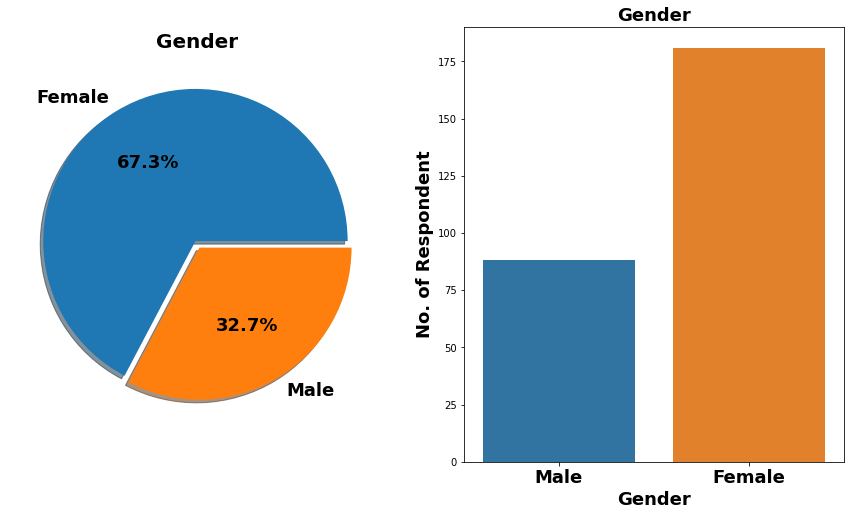

Female    181
Male       88
Name: Gender, dtype: int64


In [67]:
#  Gender of Respondent
f,ax=plt.subplots(1,2,figsize=(15,8))

customerdata.iloc[:,0].value_counts().plot.pie(explode=[0.025,0.025],autopct='%3.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':18}, ax=ax[0],shadow=True)
ax[0].set_title('Gender', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')

sns.countplot(customerdata.iloc[:,0],data=customerdata,ax=ax[1])
ax[1].set_title('Gender',fontsize=18,fontweight ='bold')
ax[1].set_xlabel("Gender",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("No. of Respondent",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=18,fontweight ='bold')
plt.show()
print(customerdata.iloc[:,0].value_counts())

from graph we can say that there are 67.3% females and 32.7% males participated in research. Womens are more interested in shopping than males

# Age wise customer analysis

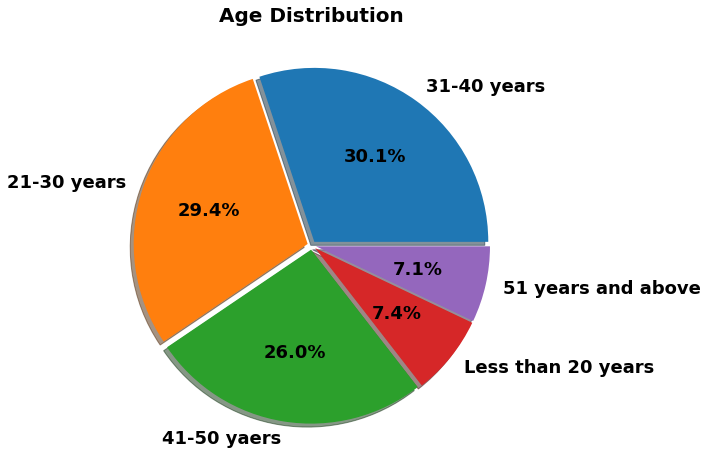

31-40 years           81
21-30 years           79
41-50 yaers           70
Less than 20 years    20
51 years and above    19
Name: Age, dtype: int64


In [68]:
# Age
f,ax=plt.subplots(1,1,figsize=(15,8))
customerdata.iloc[:,1].value_counts().plot.pie(explode=[0.025,0.025,0.025,0.025,0.025],autopct='%3.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':18}, ax=ax,shadow=True)
ax.set_title('Age Distribution', fontsize=20,fontweight ='bold')
ax.set_ylabel('')

plt.show()
print(customerdata.iloc[:,1].value_counts())

Observation :
The Majority of Respondent are having 31-40 years followed by age group 21-30 years with very less difference.

Online shopping is not much affected by Age group as even less than 20 years customers are using online platforms for shopping

Pie plot for the column: City
Delhi            58
Greater Noida    43
Noida            40
Bangalore        37
Karnal           27
Solan            18
Ghaziabad        18
Gurgaon          12
Merrut            9
Moradabad         5
Bulandshahr       2
Name: City, dtype: int64


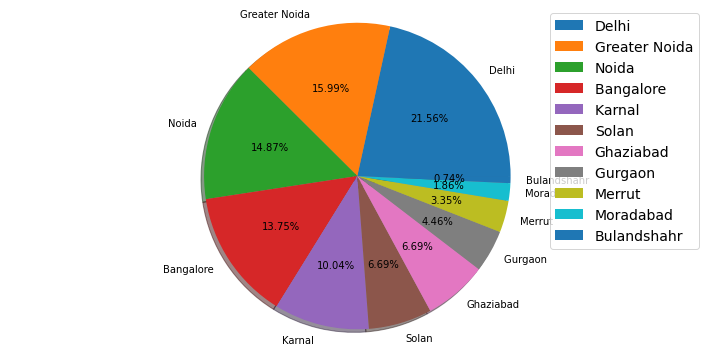

-----------------------------------------------------------------------------------------------------------------------------
Pie plot for the column: Internet_Access
Mobile Internet    189
Wi-Fi               76
Dial-up              4
Name: Internet_Access, dtype: int64


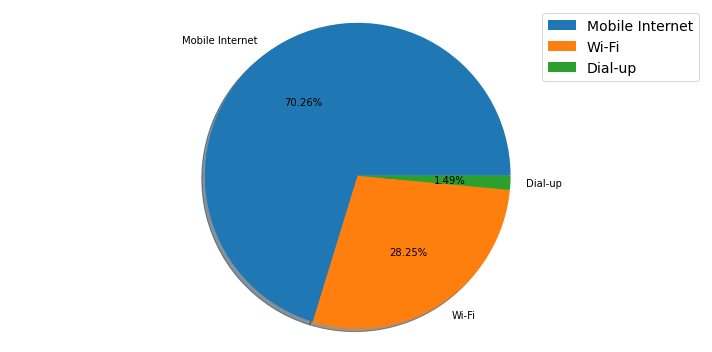

-----------------------------------------------------------------------------------------------------------------------------
Pie plot for the column: OS
Window/windows Mobile    122
Android                   85
IOS/Mac                   62
Name: OS, dtype: int64


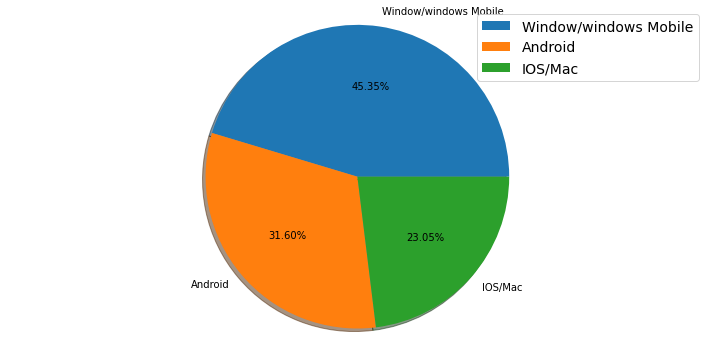

-----------------------------------------------------------------------------------------------------------------------------
Pie plot for the column: Channel_First
Search Engine        230
Content Marketing     20
Display Adverts       19
Name: Channel_First, dtype: int64


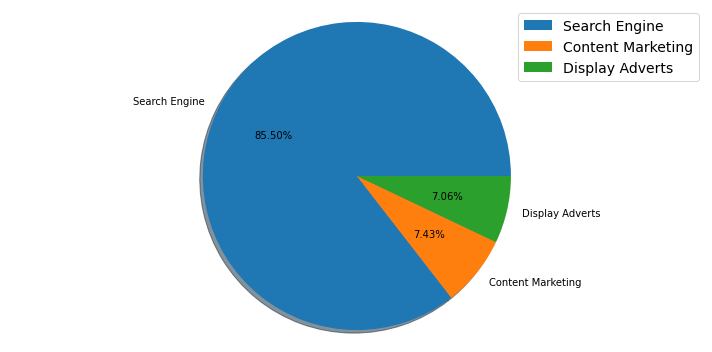

-----------------------------------------------------------------------------------------------------------------------------
Pie plot for the column: Payment_Mode
Credit/Debit cards                    148
Cash on delivery (CoD)                 76
E-wallets (Paytm, Freecharge etc.)     45
Name: Payment_Mode, dtype: int64


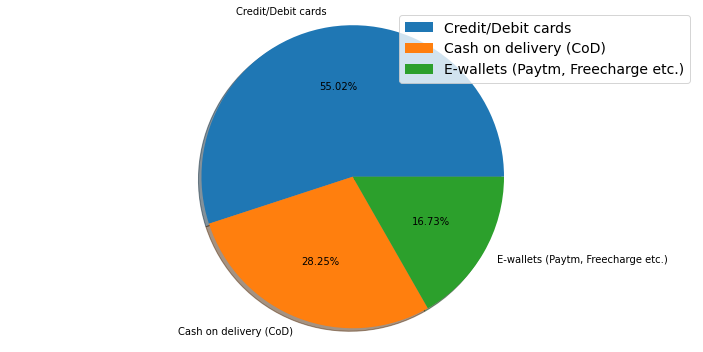

-----------------------------------------------------------------------------------------------------------------------------
Pie plot for the column: Convenient_Payment_Mode
Agree (4)        239
Dis-agree (2)     30
Name: Convenient_Payment_Mode, dtype: int64


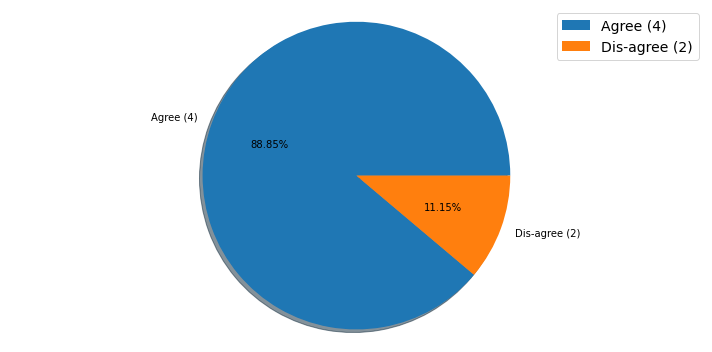

-----------------------------------------------------------------------------------------------------------------------------
Pie plot for the column: Customer_Privacy_Guarantee
Agree (4)          243
indifferent (3)     26
Name: Customer_Privacy_Guarantee, dtype: int64


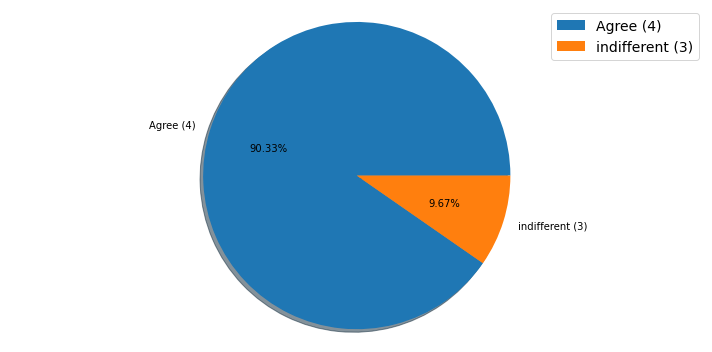

-----------------------------------------------------------------------------------------------------------------------------
Pie plot for the column: Benefits
Agree (4)          190
indifferent (3)     50
Dis-agree (2)       29
Name: Benefits, dtype: int64


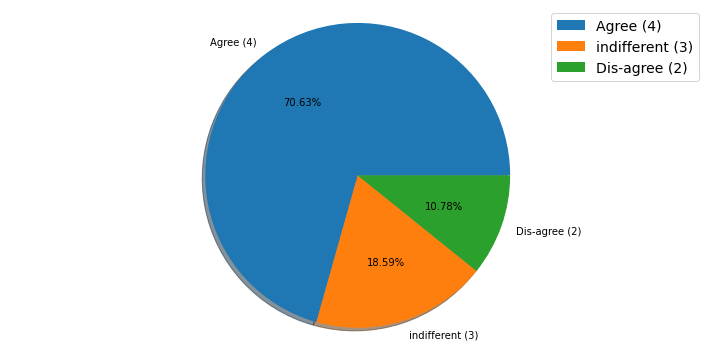

-----------------------------------------------------------------------------------------------------------------------------
Pie plot for the column: Enjoy
Agree (4)          145
indifferent (3)     75
Dis-agree (2)       49
Name: Enjoy, dtype: int64


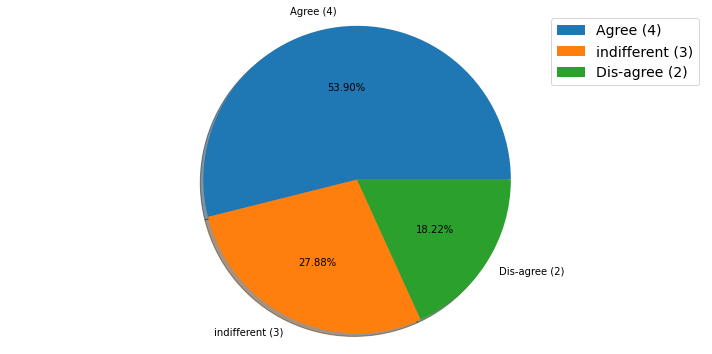

-----------------------------------------------------------------------------------------------------------------------------
Pie plot for the column: Return_Replacement_Policy
Agree (4)        249
Dis-agree (2)     20
Name: Return_Replacement_Policy, dtype: int64


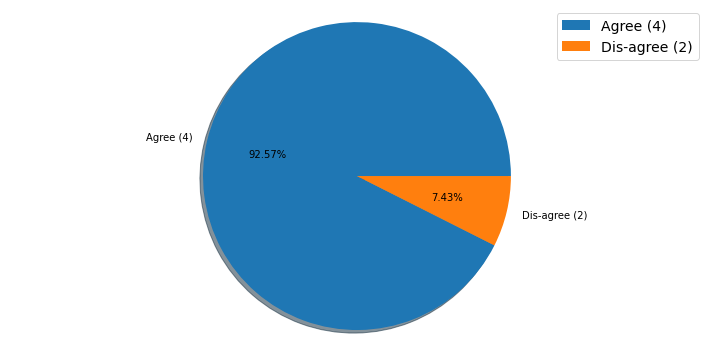

-----------------------------------------------------------------------------------------------------------------------------
Pie plot for the column: Loyalty_Programs_Access
Agree (4)          179
indifferent (3)     64
Dis-agree (2)       26
Name: Loyalty_Programs_Access, dtype: int64


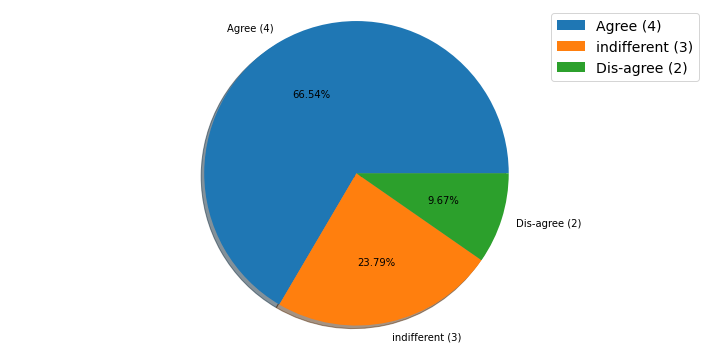

-----------------------------------------------------------------------------------------------------------------------------
Pie plot for the column: Info_Satisfaction
Agree (4)          213
indifferent (3)     56
Name: Info_Satisfaction, dtype: int64


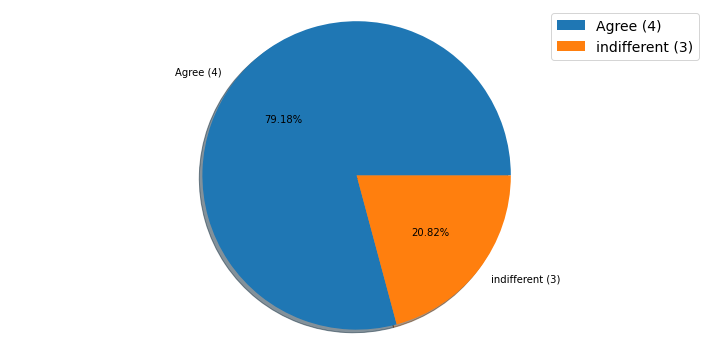

-----------------------------------------------------------------------------------------------------------------------------
Pie plot for the column: Site_Quality_Satisfaction
Agree (4)        261
Dis-agree (2)      8
Name: Site_Quality_Satisfaction, dtype: int64


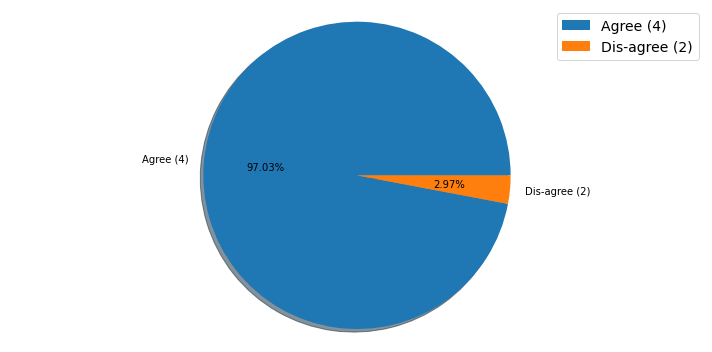

-----------------------------------------------------------------------------------------------------------------------------
Pie plot for the column: Net_Benefit_Satisfaction
Agree (4)          218
indifferent (3)     40
Dis-agree (2)       11
Name: Net_Benefit_Satisfaction, dtype: int64


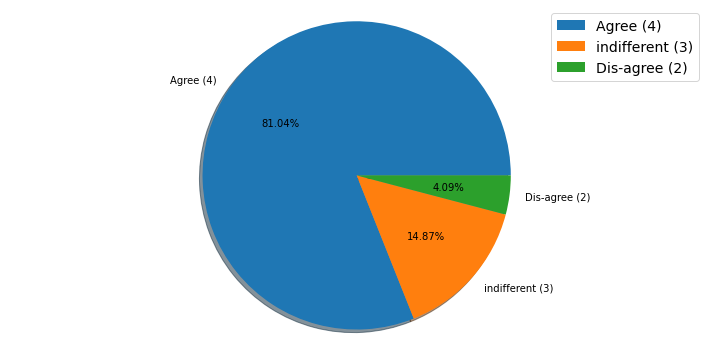

-----------------------------------------------------------------------------------------------------------------------------
Pie plot for the column: Trust
Agree (4)          239
Dis-agree (2)       25
indifferent (3)      5
Name: Trust, dtype: int64


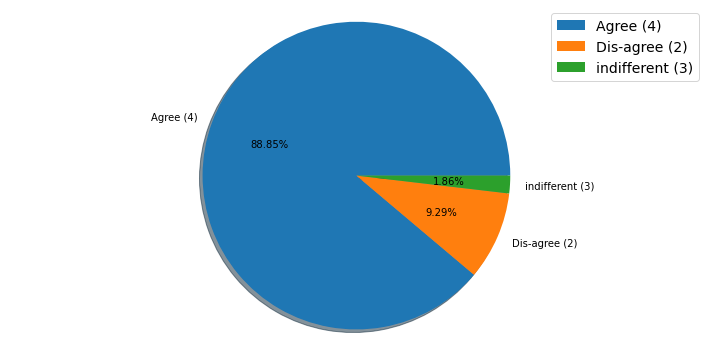

-----------------------------------------------------------------------------------------------------------------------------
Pie plot for the column: Monetary_Savings
Agree (4)          223
Disagree (2)        31
indifferent (3)     15
Name: Monetary_Savings, dtype: int64


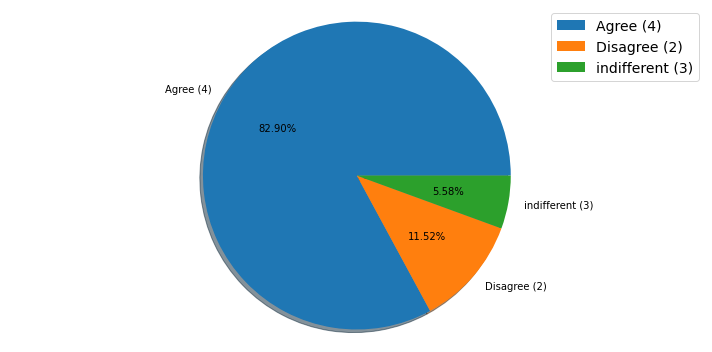

-----------------------------------------------------------------------------------------------------------------------------
Pie plot for the column: Patronizing_Convenience
Agree (4)          192
indifferent (3)     77
Name: Patronizing_Convenience, dtype: int64


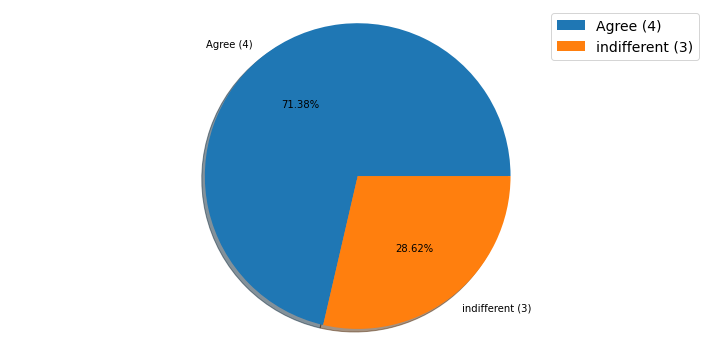

-----------------------------------------------------------------------------------------------------------------------------
Pie plot for the column: Adventure_Sense
Agree (4)          155
indifferent (3)     59
Dis-agree (2)       55
Name: Adventure_Sense, dtype: int64


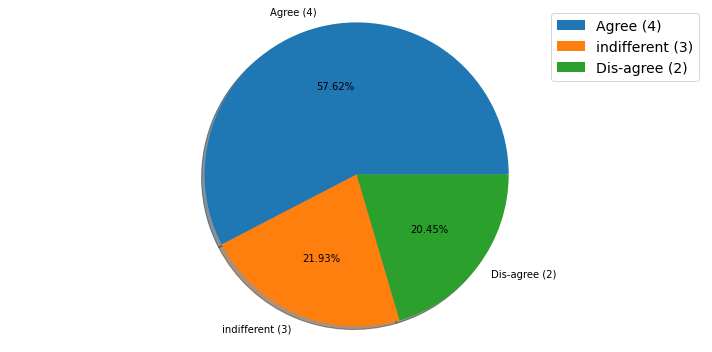

-----------------------------------------------------------------------------------------------------------------------------
Pie plot for the column: Social_Status
Agree (4)          107
indifferent (3)    100
Dis-agree (2)       62
Name: Social_Status, dtype: int64


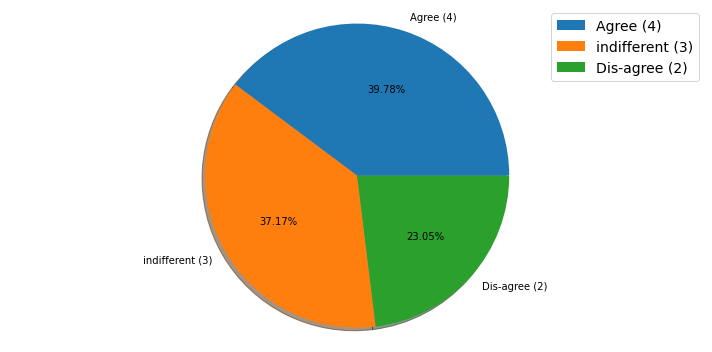

-----------------------------------------------------------------------------------------------------------------------------
Pie plot for the column: Gratification
Agree (4)          128
indifferent (3)    101
Disagree (2)        40
Name: Gratification, dtype: int64


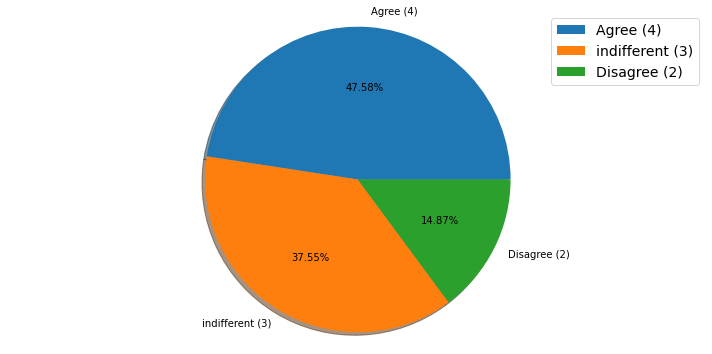

-----------------------------------------------------------------------------------------------------------------------------
Pie plot for the column: Money_Worthy
Agree (4)          231
indifferent (3)     38
Name: Money_Worthy, dtype: int64


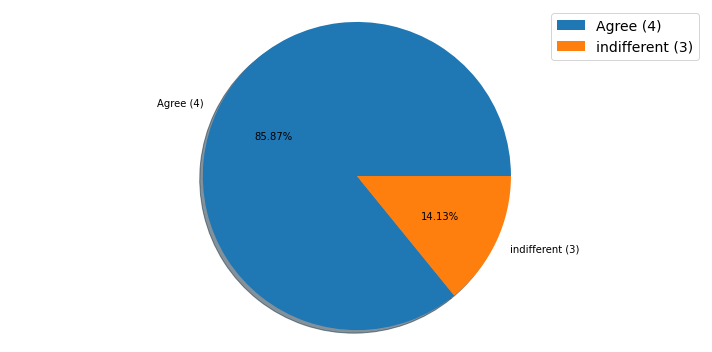

-----------------------------------------------------------------------------------------------------------------------------


In [74]:
def generate_pie(i):
    plt.figure(figsize=(10,5))
    plt.pie(i.value_counts(), labels=i.value_counts().index, autopct='%1.2f%%',shadow=True,)
    plt.legend(prop={'size':14})
    plt.axis('equal')
    plt.tight_layout()
    return plt.show()

cols1 = ['City','Internet_Access','OS','Channel_First', 'Payment_Mode','Convenient_Payment_Mode','Customer_Privacy_Guarantee','Benefits','Enjoy','Return_Replacement_Policy','Loyalty_Programs_Access','Info_Satisfaction','Site_Quality_Satisfaction','Net_Benefit_Satisfaction','Trust','Monetary_Savings','Patronizing_Convenience','Adventure_Sense','Social_Status','Gratification','Money_Worthy']

plotnumber=1
for j in customerdata[cols1]:
    print(f"Pie plot for the column:", j)
    print(customerdata[j].value_counts())
    generate_pie(customerdata[j])
    print("-"*125)

Observations:
 Delhi, Greater Noida, Noida and Bangalore cities are ahead of all cities in online shopping.
 
 
 Most of the customers used Google chrome to access the website and only few of the customers used Opera and Mozilla Firefox to access the online shopping website.


Most of the customers used Smartphone device to access the online shopping and only few customers used Tablet to access the online shopping.

45.36% people use windows mobile as operating system followed by android (31.06%) and IOS/Mac (23.05%)



85.5% customers used Search Engine and Via application to reach the online retail store after their first visit and also some customers used Detect URL to reach the online store. Which means these customers have downloaded their most favourite application to reach the online stores easily. content marketing and display Adverts each were used by near about 7% customers.


Most prefered payment mode by customer was Credit card (55%) follwed by COD and E-wallets(16%)


88.55% people agreed that shapping platforms have convenient payment modes.


90.33 % customers agreed that online shopping platforms guarantees customer privacy.


70.3% customers agreed that online shopping platforms provide shopping benefits.


92.57% customers agreed that online shopping platforms provide better service as per return and replacement policy.

 
Many customers took more than 15 mins before making the purchase decision and some of the customers explored 6-10 mins.
Most of the customers abandoned their shopping cart sometimes and some of the customers abandoned their shopping cart frequently.
Around 133 customers abandoned their bag due to some better alternative offer and 54 customers abandoned due to promo code not applicable.
Around 90% of the customers agreed that the content on the website is easy to read and understand.


Around 77% of the customers agreed that the information on similar product to the one highlighted is important for product comparison.

About 70% of the customers agreed that complete information on listed seller and product being offered is important for purchase decision.


88.84% of the customers agreed that all relevant information on listed products must be stated clearly and only 11% of the customers disageed with it.


91% of the customers agreed that ease of navigation in website helps them more.



Most of the customers agreed that they have no issues with the loading and processing speed.


87% of the customers agreed with user friendly website interface. Creating new user friendly websites will impact on customers to shop more online. By doing this customers don't have to work around much and overall shoping experience would be smooth.


84% of the customers trusted that the online retail store will fulfill its part of the transaction at the stipulated time.
The count is high for the customers who agreed the empathy (readiness to assist with queries) towards the customers in the online shopping website is very helpful. If the online shopping companies ready to assist with customers queries then there will be benefit for both company and the customers.


The count is high for the customers who agreed that the responsiveness, availability of several communication channels will help them more while shopping online which means if one channel is not available then customers can easily reach out to other channel to fulfill their benifits. So it is important for the companies to provide various channels to communicate with the customers.

83% of the customers agreed that shopping online is convenient and flexible and 12% of the customers are indifferent which means either they are agreed to this or disagreed and only 5% of the customers completely disagreed with it.
Most of the customers agreed to offering a wide variety of listed product in several category and the count is high for the same.


Around 86% of the customers would like to have provision of complete and relevant product information in the online shopping website.



47% of the customers agreed that shopping on the website helps them fulfilling certain roles and 33% of the customers are in confusion whether to agree or disagree and only 20% of the customers disagrees with it.


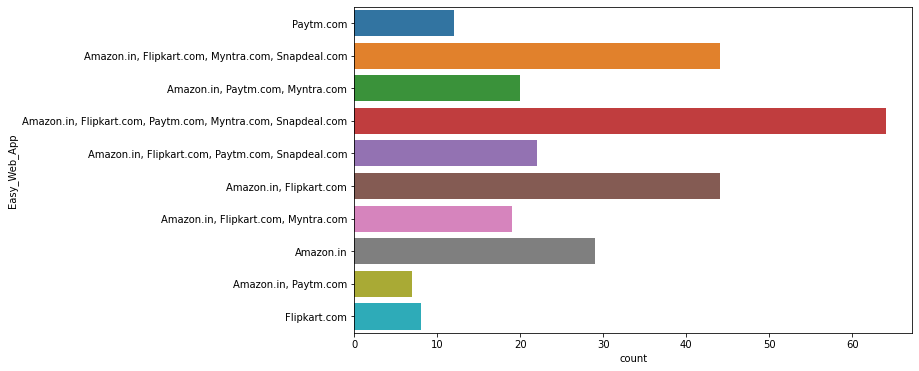

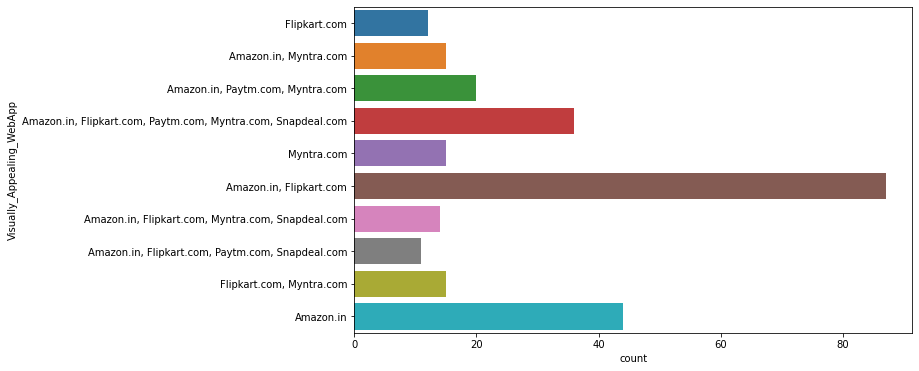

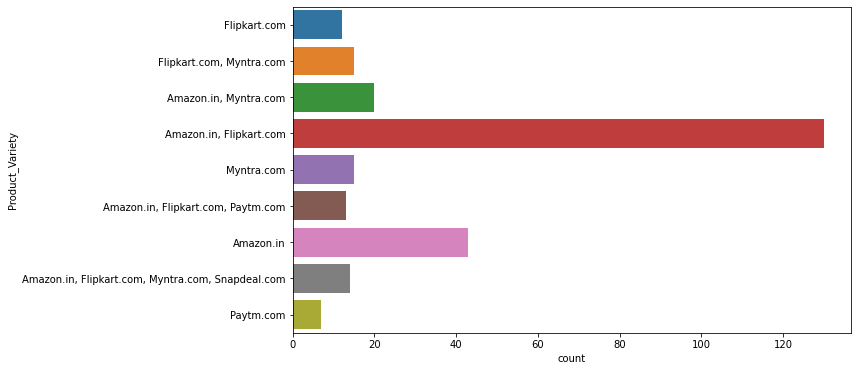

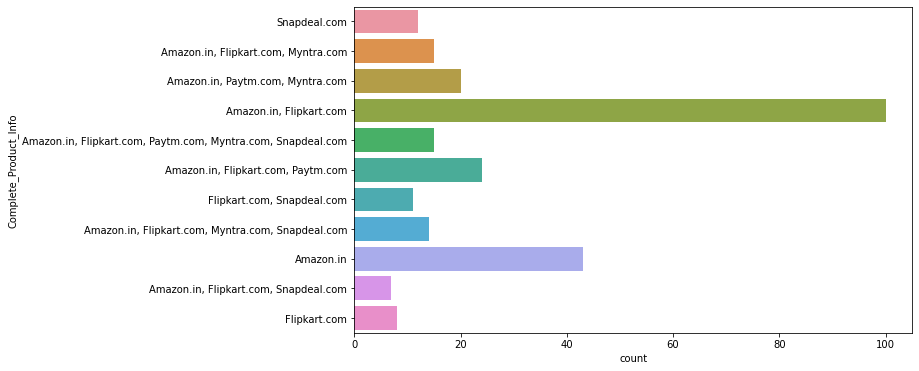

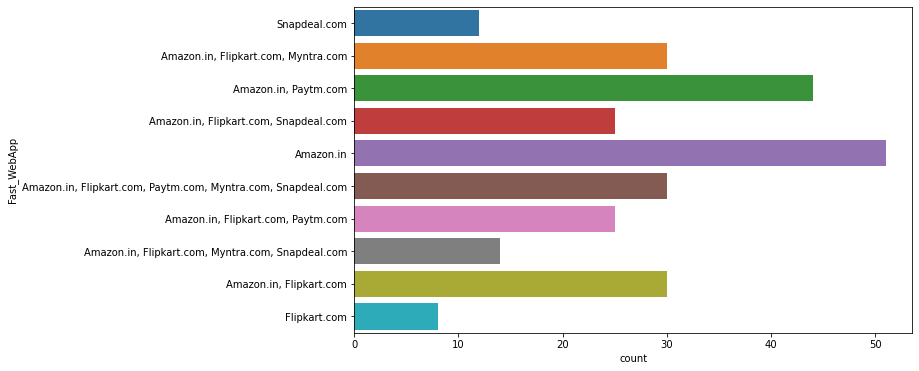

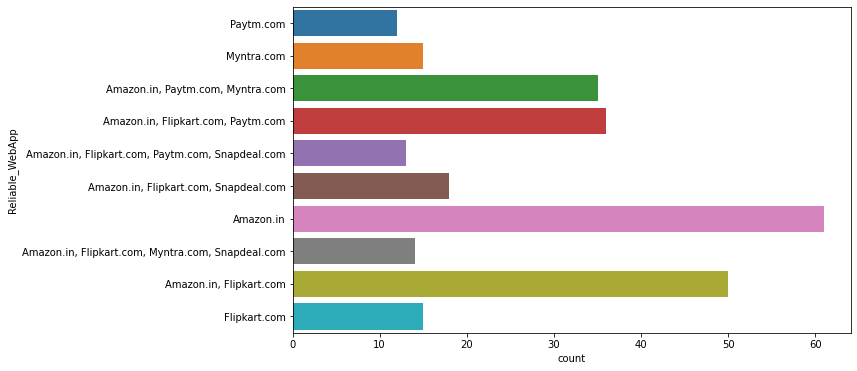

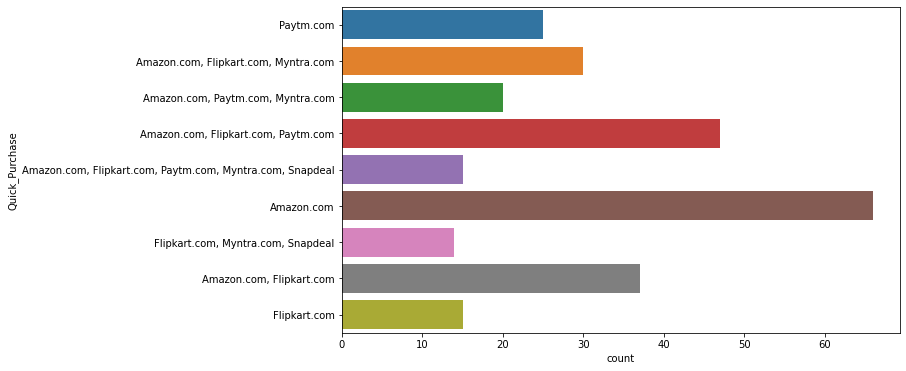

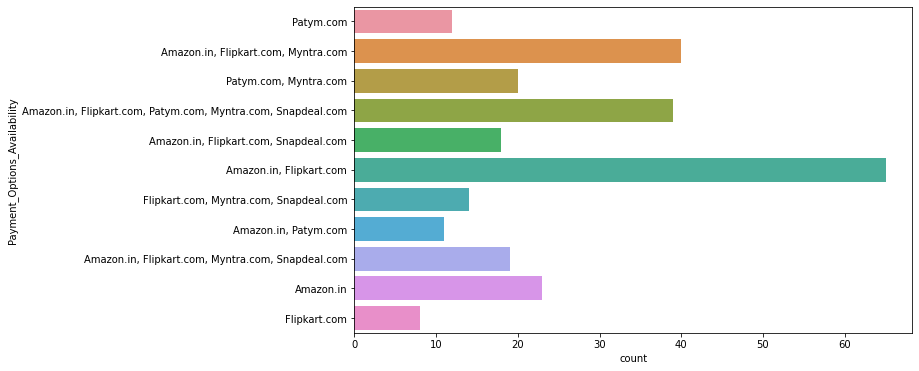

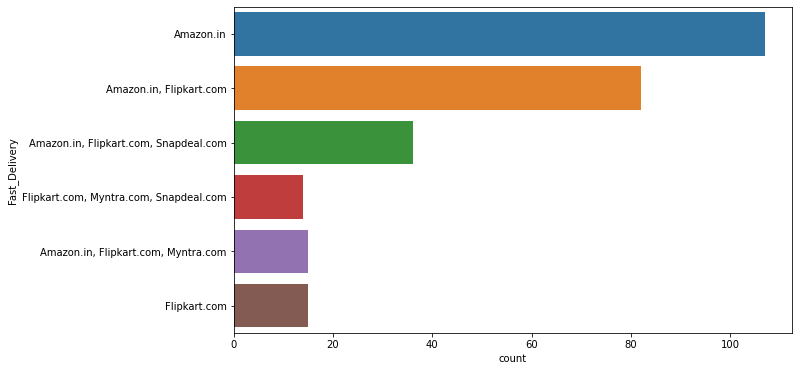

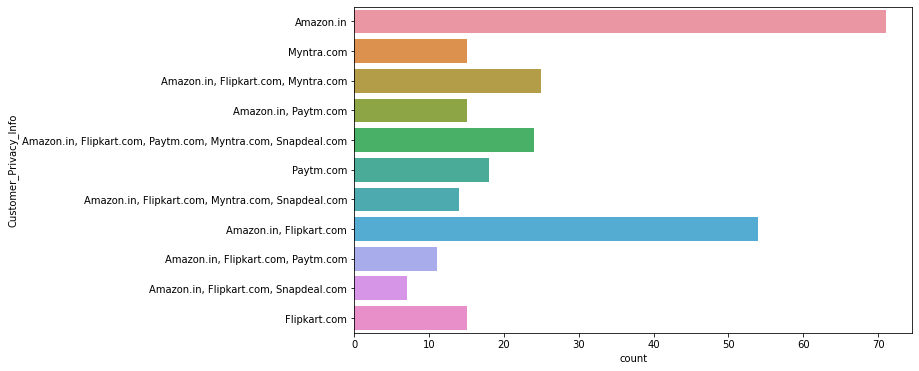

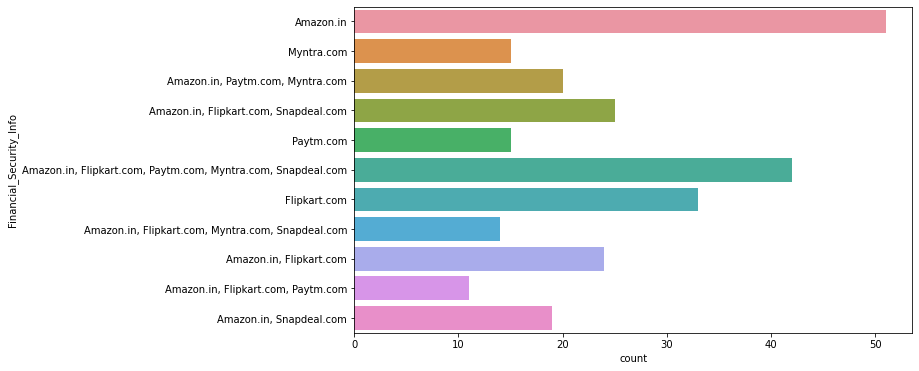

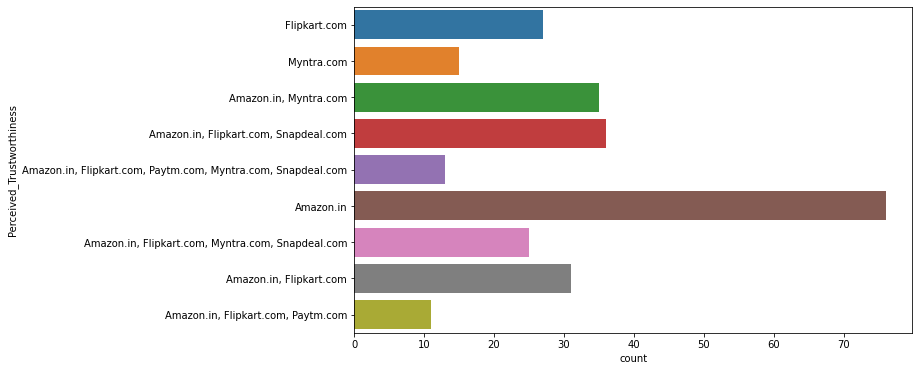

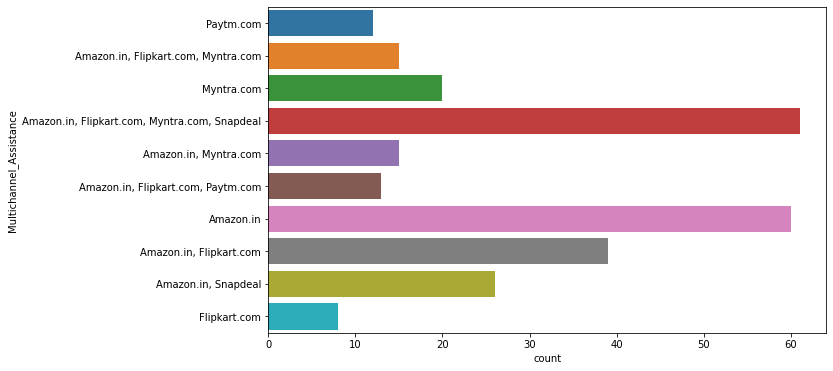

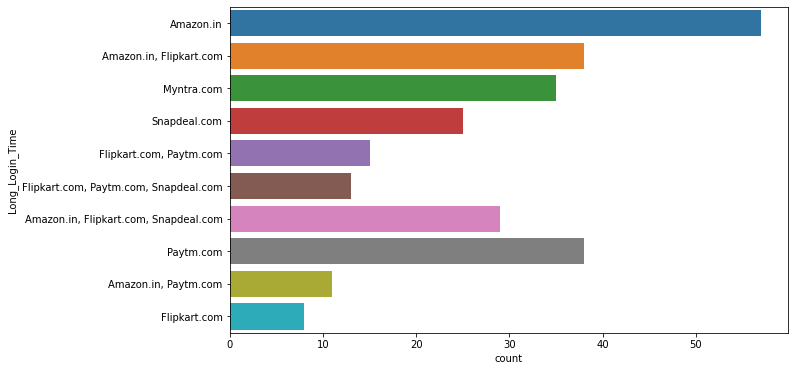

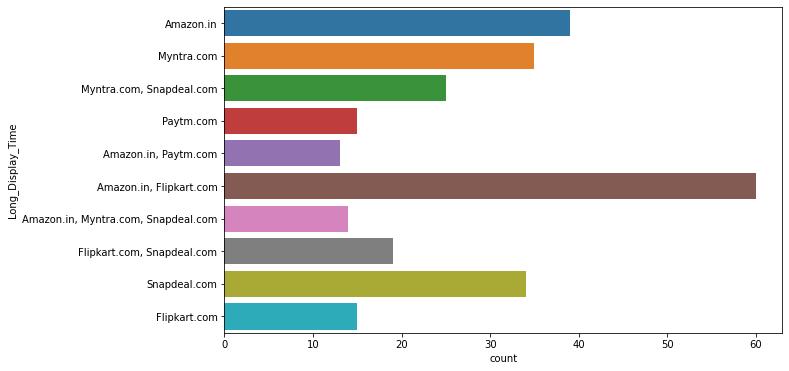

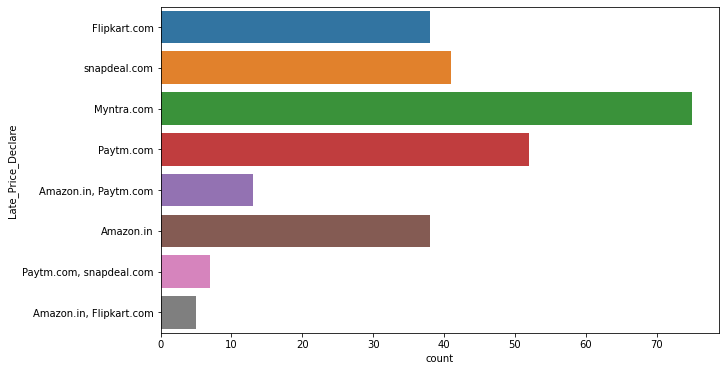

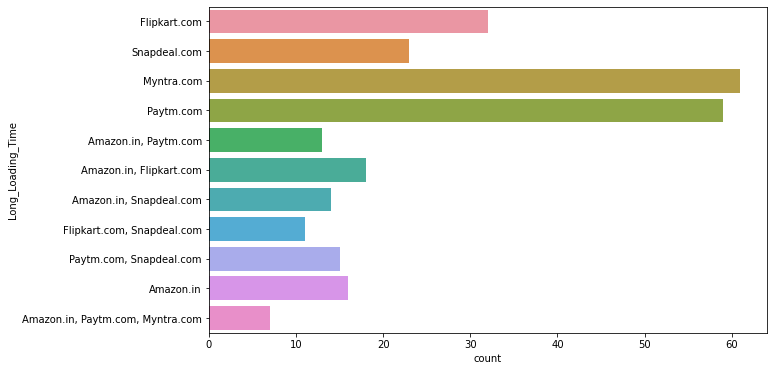

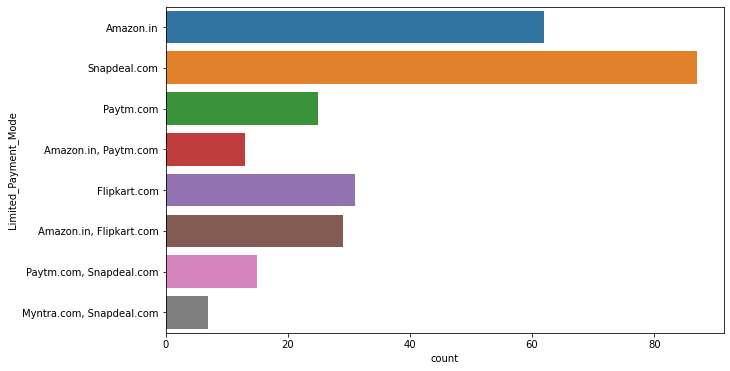

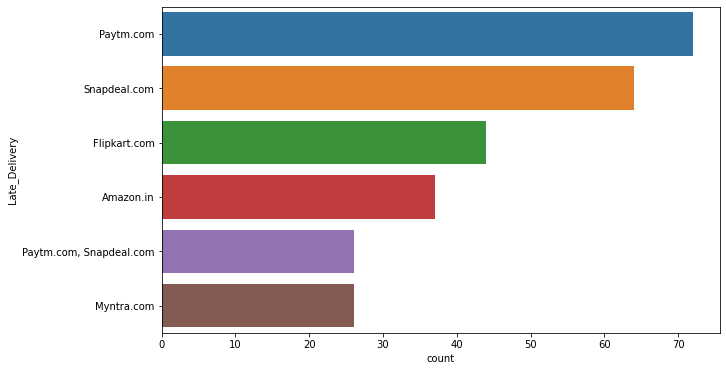

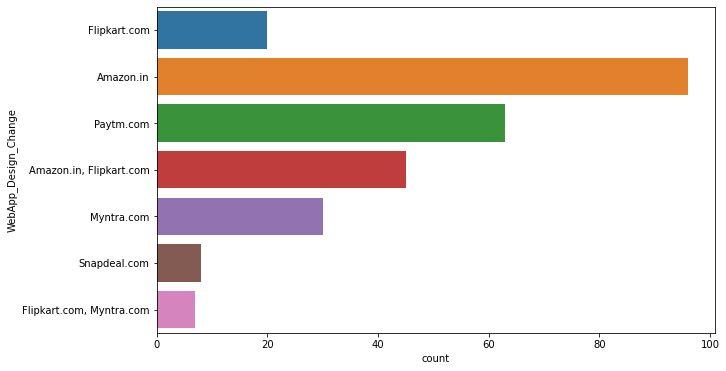

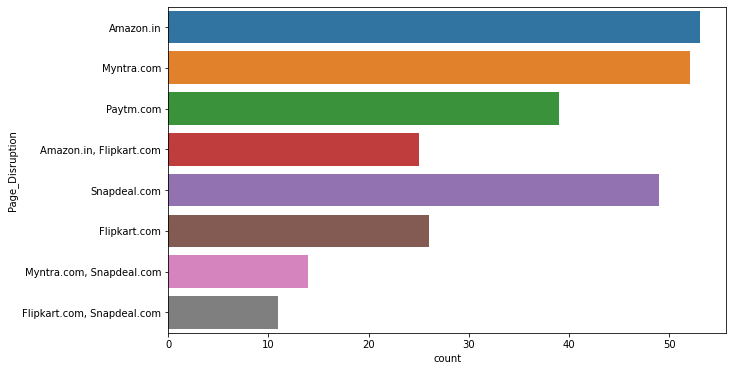

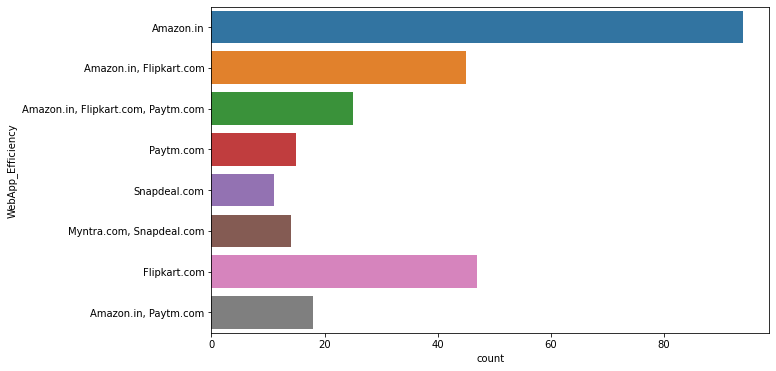

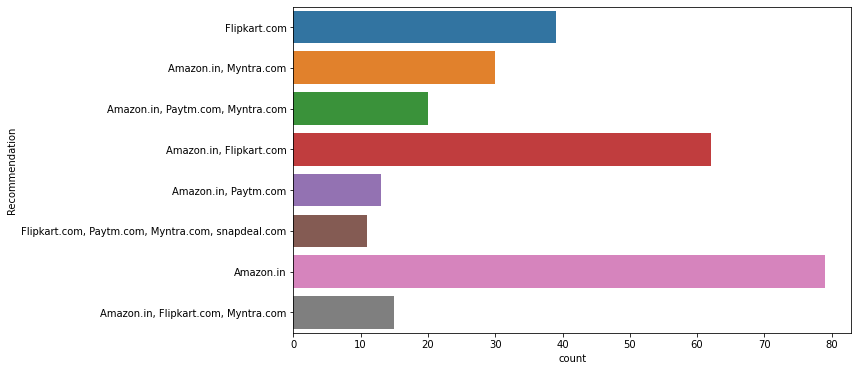

In [76]:
# Site questions
# define a count plot  funtion
def counth(x):
    plt.figure(figsize = (10,6))
    sns.countplot(y=x,data=customerdata)
    plt.show()
for i in customerdata.columns[48:]:
    counth(i)

Observation :

 Amazon.in, Flipkart.com and Myntra.com are rated as userfiriendly and most attractive online shopping websites/applications.
Late declaration of price and more pege loading time : Myntra , Snapdeal and Paytm

Amazon.com and Flipkart.com have highest rating for most visually appealing websites, more product variety, complete product information and availability of more payment options.

Amazon.com is leading in Fastest and reliable WebApp , Quick purchase than other shopping platforms.


Amazon.com is seen as most trust worthy as it takes care of customer's privacy


 Myntra and Snapdeal offers Frequent disruption when moving to another page.
 
 
 
 Most of the people shopped from Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com companies and they think that it is easy to use website or applicatiion in these companies.
 
 
Amazon.in and Flipkart.com have high visual appealing web-page layout compared to others.


half of  of the customers says that amazon and flipkart shows wide variety of products in their shopping websited compared to other websites. It's important for the companies to show different types of products to gain customers rate.


37% of the customers liked amazon and flipkart in displaying complete and relevant information of the products.
Around 51 customers says that Amazon.in is the fast loading website and application and they liked it. About 44 customers liked the web speed of both amazon and paytm followed by amazon ad flipkart.

The count is high for amazon followed by amazon and flipkart which means most of the customers liked the reliability of website or application in amazon and flipkart.


Most of the customers likes Amazon's quickness to complete the purchase followed by Flipart's and only few of the customers likes Myntra website.


In Amazon and flipkart websites there are several payment options available compared to the other shopping websites.
Most of the customers liked Amazon's delivery speed followed by flipkart and snapdeal.


Most of the customers trusts amazon followed by flipkart in terms of keeping the privacy of their data information.


The count is high for the customers who belives that amazon website keeps their finanacial information secrete also the customers trusts flipkart, Myntra, Snapdeal and paytm in terms of keeping thier finanacial information secured.


Most of the customers believed that Amazon has perceived trustworthiness comapared to others. Apart from this customers believed that flipkart and Myntra also have perceived trustworthiness.


Most of the customers like Amazon inerms of presence of online assistance through multi-channel followed by flipkart,Myntra and snapdeal.


Most of the customers agreed that Amazon takes longer time to get logged them in.


Customers believes that Amazon and flipkart takes longer time in display the graphics and photos in sales period.


Customers says that Myntra and paytm have late declaration of price in promotion/sales period compared to others.
Also Myntra and paytm takes longer page loading time.



Snapdeal.com has limited mode of payment on most products followed by Amazon.in.


In terms of time taken in product delivery Paytm has highest count followed by Snapdeal.com.


Most of the customers disliked change in website/Application design on amazon followed by paytm.


Most of the customers disliked frequent disruption when moving from one page to another on amazon, Myntra and snapdeal.


Most of the customers believes that Amazon and flipkart website is as efficient as before.


Most of the customers would like to recommend amazon retailer to a friend followed by flipkart.

# Bivariate Analysis

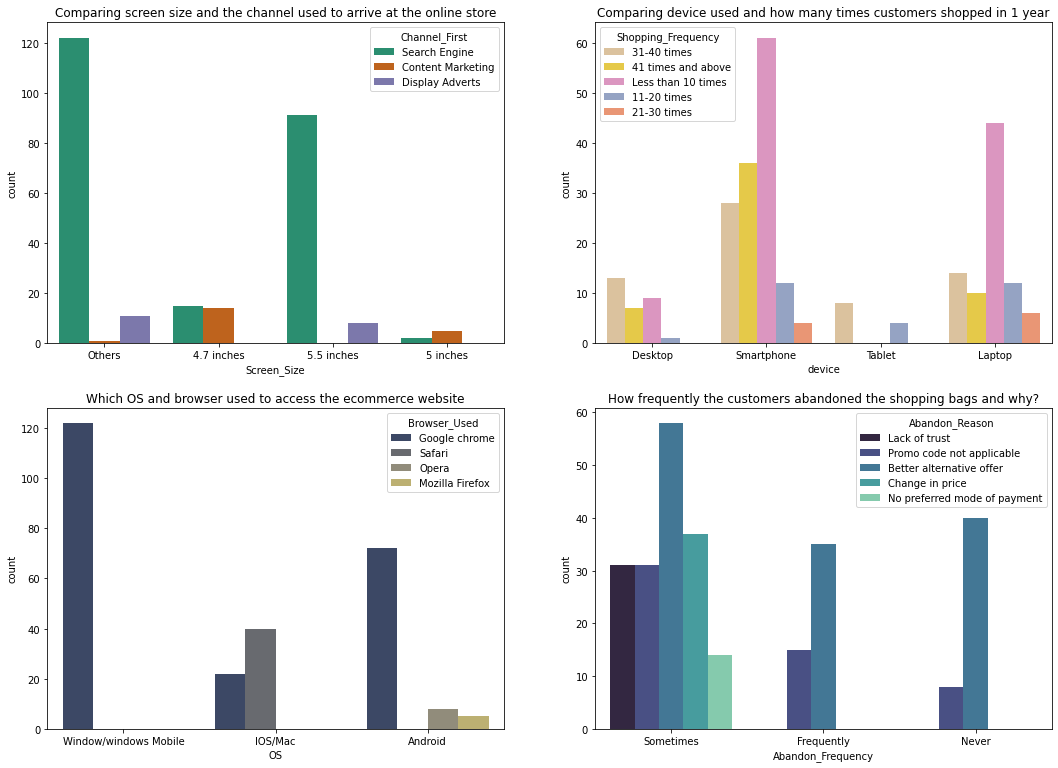

In [81]:
plt.figure(figsize=[18,13])

plt.subplot(2,2,1)
plt.title('Comparing screen size and the channel used to arrive at the online store',fontsize=12)
sns.countplot(customerdata['Screen_Size'],hue=customerdata['Channel_First'],palette="Dark2");

plt.subplot(2,2,2)
plt.title('Comparing device used and how many times customers shopped in 1 year',fontsize=12)
sns.countplot(customerdata['device'],hue=customerdata['Shopping_Frequency'],palette="Set2_r");

plt.subplot(2,2,3)
plt.title('Which OS and browser used to access the ecommerce website',fontsize=12)
sns.countplot(customerdata['OS'],hue=customerdata['Browser_Used'],palette="cividis");

plt.subplot(2,2,4)
plt.title('How frequently the customers abandoned the shopping bags and why?',fontsize=12)
sns.countplot(customerdata['Abandon_Frequency'],hue=customerdata['Abandon_Reason'],palette="mako");

plt.subplot(2,2,2).legend(loc ="upper left",title="Shopping_Frequency");
plt.subplot(2,2,4).legend(loc ="upper right",title="Abandon_Reason");
plt.show()

Observations:

The customers having their mobile screen size say 6 inches(others) have followed search engine channel to arrive at their favorite online store for the first time. Also the customers who have their screen size 5.5 inches also used search engine channel to access the online shopping store.


Most of the customers used Smartphones 31-40 times in an year to access the ecommerce websites to shop the products.
Many customers having windows operating system in their device ran Google chrome to access the ecommerce shopping websites and some of the customers having IOS/Mac operating system used Google chrome as well as Safari to reach the online shopping store.


Due to Lack of trust on the ecommerce websites, sometimes most of the customers abandoned the websites and some of the customers abandoned the shopping website due to the promo code not applicable. which means, if the product is having the special price or some catalogue price rule is applicable on it.Then coupon code should not be applicable on the products.


So it is important for the ecommerce companies to create discount price, offers, coupon codes to retain the customers.

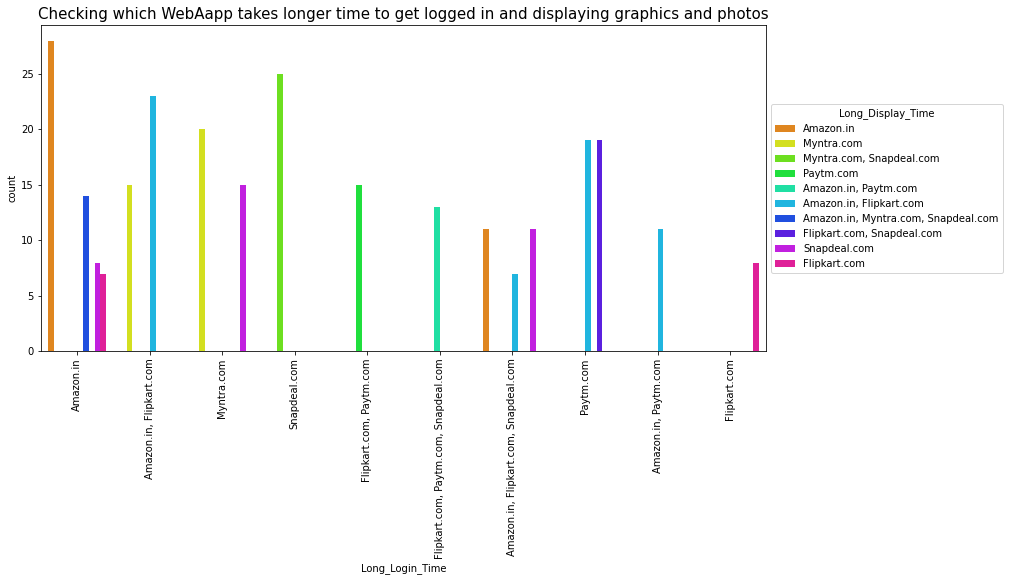

In [83]:
# Comparing Long_Login_Time and Long_Display_Time
plt.figure(figsize=(13,6))
plt.title('Checking which WebAapp takes longer time to get logged in and displaying graphics and photos',fontsize=15)
sns.countplot(x='Long_Login_Time',hue='Long_Display_Time',palette="hsv",data=customerdata);
plt.xticks(rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),title="Long_Display_Time")
plt.show()

The customers mostly choose amazon website for buying products as it gives promotions and sales periods in some days, on these days most of the customers attracted by the offers provided by the websites, wants to buy the products. So, amazon will take more time to allow the customers to get login into the site.



When there is promotion or sales period, amazon and Myntra takes longer time to display the graphics and photos.

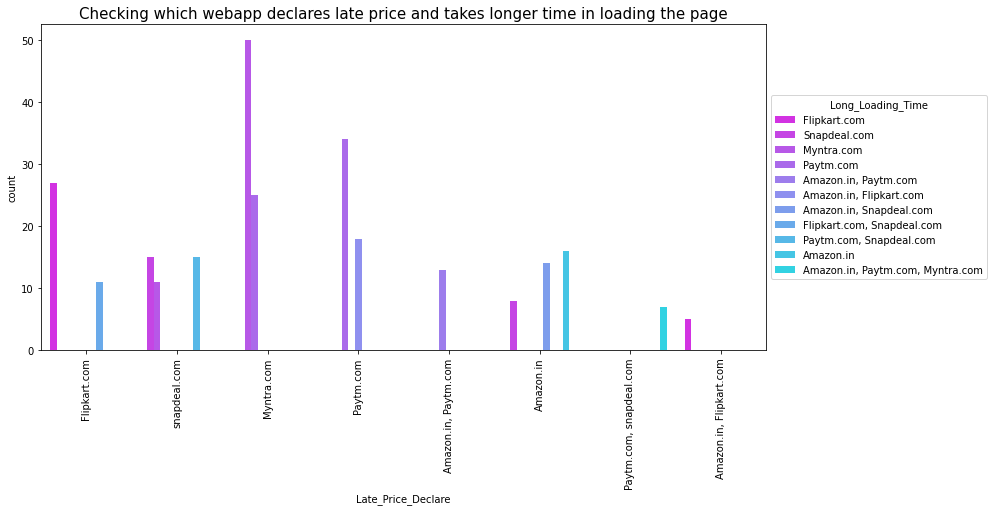

In [85]:
# Comparing Late_Price_Declare and Long_Loading_Time
plt.figure(figsize=(13,6))
plt.title('Checking which webapp declares late price and takes longer time in loading the page',fontsize=15)
sns.countplot(x='Late_Price_Declare',hue='Long_Loading_Time',palette="cool_r",data=customerdata);
plt.xticks(rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),title="Long_Loading_Time")
plt.show()

When there is promotion and sales, Myntra takes time ti load the page and it has late declaration of price in these days.



Myntra declare the late price in order to clear the sales and they fix the price by comparing with other websites and they end up sales by providing benefits to the customers. In this time most of the customers tries to shop in this website so it takes long loading time.

# Conclusion


This study aims to understand the influence of utilitarian values, hedonic values, customer experience and perceived risk on E-commerce customer satisfaction in India.

The analysis shows that the Utilitarian Value significantly influences Customer Satisfaction, meaning that the level of Utilitarian Value of e-commerce customers will affect the level of Customer Satisfaction. In other words, the better (higher) Utilitarian Value given by e-commerce products will lead to satisfaction with customers. Hedonic Value significantly influences Customer Satisfaction, meaning that the high and low Hedonic Value of e-commerce customers will affect the level of Customer Satisfaction. In other words, the higher the Hedonic Value given by e-commerce products will lead to the satisfaction of e-commerce customers. The following factors should be considered by the E-commerce websites to improve the customer satisfaction:


Utilitarian Value

•Product offerings •Product information •Monetary savings •Convenience

Hedonic Value
•Adventure Shopping •Social Shopping •Gratification Shopping •Idea Shopping •Role Shopping •Value Shopping 3. Social Value •Feel acceptable •Good impression •I am perceived •Social approval

Perceived Risk
•Financial Risk •Functional Risk •Physical Risk •Psychological Risk •Social Risk •Temporal Risk

Customer Satisfaction
•Purchasing Experience •Site Selection

Hence we can conclude that

Amazon.in
Flipkart.com
 are performing well in dealing with customer stisfaction and customer renetion.
 
 
 There is high risk of customer churn with:

Myntra.com


Snapdeal.com


Paytm.com

# Label Encoding:

In [87]:
from sklearn.preprocessing import LabelEncoder

LE=LabelEncoder()
for i in customerdata.columns:
    if customerdata[i].dtypes=="object":
        customerdata[i]=LE.fit_transform(customerdata[i])

In [88]:
customerdata.head()

Gender  Age  City  citycode  Shopping_stared  Shopping_Frequency  \
0       1    1     2    110009                3                   2   
1       0    0     2    110030                3                   3   
2       0    0     4    201308                2                   3   
3       1    0     6    132001                2                   4   
4       0    0     0    530068                1                   0   

   Internet_Access  device  Screen_Size  OS  Browser_Used  Channel_First  \
0                0       0            3   2             0              2   
1                2       2            0   1             0              2   
2                1       2            2   0             0              2   
3                1       2            2   1             3              2   
4                2       2            0   1             3              0   

   Login_Mode  Time_Explored  Payment_Mode  Abandon_Frequency  Abandon_Reason  \
0           2              2             2                  2               2   
1           4              4             1                  0               4   
2           4              1             2                  2               4   
3           2              2             1                  1               0   
4           4              4             1                  0               0   

   Content_Readability  Similar_Product_Info  Seller_Product_Info  \
0                    0                     2                    2   
1                    0                     0                    0   
2                    0                     0                    0   
3                    0                     0                    2   
4                    0                     2                    2   

   Product_Info_Clarity  Navigation_Ease  Loading_Processing_Speed  \
0                     0                0                         1   
1                     0                0                         0   
2                     0                0                         0   
3                     0                0                         0   
4                     0                0                         0   

   User_Friendly_Interface  Convenient_Payment_Mode  Timely_Fulfilment_Trust  \
0                        1                        1                        1   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        0                        0   

   Customer_Support_Response  Customer_Privacy_Guarantee  \
0                          0                           0   
1                          0                           0   
2                          0                           0   
3                          0                           0   
4                          0                           0   

   Various_Channel_Responses  Benefits  Enjoy  Convenience  \
0                          0         2      1            1   
1                          0         0      0            0   
2                          0         0      0            0   
3                          0         0      2            2   
4                          0         0      0            0   

   Return_Replacement_Policy  Loyalty_Programs_Access  Info_Satisfaction  \
0                          1                        0                  1   
1                          0                        0                  0   
2                          0                        0                  0   
3                          0                        2                  1   
4                          0                        1                  0   

   Site_Quality_Satisfaction  Net_Benefit_Satisfaction  Trust  \
0                          0                         0     

In [89]:
# Checking statistical summary of the dataset
customerdata.describe()

Gender         Age        City       citycode  Shopping_stared  \
count  269.000000  269.000000  269.000000     269.000000       269.000000   
mean     0.327138    1.330855    4.494424  220465.747212         2.323420   
std      0.470042    1.183774    3.187687  140524.341051         1.176357   
min      0.000000    0.000000    0.000000  110008.000000         0.000000   
25%      0.000000    0.000000    2.000000  122018.000000         1.000000   
50%      0.000000    1.000000    4.000000  201303.000000         3.000000   
75%      1.000000    2.000000    7.000000  201310.000000         3.000000   
max      1.000000    4.000000   10.000000  560037.000000         4.000000   

       Shopping_Frequency  Internet_Access      device  Screen_Size  \
count          269.000000       269.000000  269.000000   269.000000   
mean             2.791822         1.267658    1.501859     2.256506   
std              1.319122         0.476025    0.751240     0.944942   
min              0.000000         0.000000    0.000000     0.000000   
25%              2.000000         1.000000    1.000000     2.000000   
50%              3.000000         1.000000    2.000000     2.000000   
75%              4.000000         2.000000    2.000000     3.000000   
max              4.000000         2.000000    3.000000     3.000000   

               OS  Browser_Used  Channel_First  Login_Mode  Time_Explored  \
count  269.000000    269.000000     269.000000  269.000000     269.000000   
mean     1.137546      0.524164       1.780669    2.081784       2.695167   
std      0.867985      1.097985       0.566672    1.555204       1.336910   
min      0.000000      0.000000       0.000000    0.000000       0.000000   
25%      0.000000      0.000000       2.000000    0.000000       2.000000   
50%      1.000000      0.000000       2.000000    2.000000       3.000000   
75%      2.000000      0.000000       2.000000    4.000000       4.000000   
max      2.000000      3.000000       2.000000    4.000000       4.000000   

       Payment_Mode  Abandon_Frequency  Abandon_Reason  Content_Readability  \
count    269.000000         269.000000      269.000000           269.000000   
mean       0.884758           1.449814        1.327138             0.159851   
std        0.661938           0.788378        1.589626             0.518776   
min        0.000000           0.000000        0.000000             0.000000   
25%        0.000000           1.000000        0.000000             0.000000   
50%        1.000000           2.000000        1.000000             0.000000   
75%        1.000000           2.000000        3.000000             0.000000   
max        2.000000           2.000000        4.000000             2.000000   

       Similar_Product_Info  Seller_Product_Info  Product_Info_Clarity  \
count            269.000000           269.000000            269.000000   
mean               0.386617             0.494424              0.111524   
std                0.747613             0.799351              0.315367   
min                0.000000             0.000000              0.000000   
25%                0.000000             0.000000              0.000000   
50%                0.000000             0.000000              0.000000   
75%                0.000000             1.000000              0.000000   
max                2.000000             2.000000              1.000000   

       Navigation_Ease  Loading_Processing_Speed  User_Friendly_Interface  \
count       269.000000                269.000000               269.000000   
mean          0.085502                  0.200743                 0.148699   
std           0.280148                  0.500596                 0.405430   
min           0.000000                  0.000000                 0.000000   
25%           0.000000                  0.000000                 0.000000   
50%           0.000000                  0.000000                 0.000000   
75%           0.000000                  0.000000                 

Analysis shows that data is skewed to right (Some of the columns have their mean value greater than the median )

Here the count of all the columns are same which means there are no missing values present in the dataset.

Some of the columns have their mean value greater than the median (50%), so we can say they are skewed to right.


In some of the columns, the median is greater than the mean, so the data is skewed to left.


We can also notice the min value, standard deviation and 25% percentile.

In summarising the data, we cna notice huge difference between max and 75% percentile in some of the columns which means there are huge outliers present in those columns. Since all the columns in the dataset are categorical, no need to remove outliers and skewness.


and outliers are present in the data. But its categorial data. so no need to remove skewness and outliers.